In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat

In [2]:
# loading data
data=loadmat("ex8data1.mat")
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 15:37:10 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[13.04681517, 14.74115241],
        [13.40852019, 13.7632696 ],
        [14.19591481, 15.85318113],
        [14.91470077, 16.17425987],
        [13.57669961, 14.04284944],
        [13.92240251, 13.40646894],
        [12.82213164, 14.22318782],
        [15.67636615, 15.89169137],
        [16.16287532, 16.20299807],
        [12.66645095, 14.89908374],
        [13.98454962, 12.95800822],
        [14.06146043, 14.54908874],
        [13.38988671, 15.56202142],
        [13.39350475, 15.62698794],
        [13.97900926, 13.28061494],
        [14.16791259, 14.46583829],
        [13.96176145, 14.75182421],
        [14.45899735, 15.07018563],
        [14.58476372, 15.82743424],
        [12.07427074, 13.0671109 ],
        [13.5491294 , 15.53827677],
        [13.98625042, 14.78776304],
        [14.96991942, 16.51830493],
        [14.25576597, 15.294

In [5]:
x=data['X']
xval=data['Xval']
yval=data['yval']

In [6]:
x.shape

(307, 2)

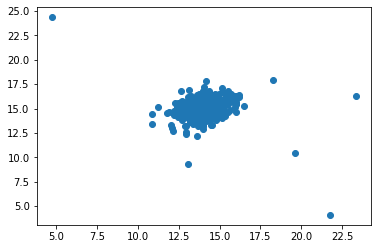

In [7]:
# plot the data
plt.scatter(x[:,0],x[:,1])
plt.show()

In [8]:
# guassian model function
mu=x.mean(axis=0)
sigma=x.var(axis=0)
mu,sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [9]:
from scipy import stats
p=np.zeros((x.shape[0],x.shape[1]))
p

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [13]:
p[:,0]=stats.norm(mu[0],sigma[0]).pdf(x[:,0])
p[:,1]=stats.norm(mu[1],sigma[1]).pdf(x[:,1])
p.shape

(307, 2)

In [15]:
# x val values
pval=np.zeros((xval.shape[0],xval.shape[1]))
pval[:,0]=stats.norm(mu[0],sigma[0]).pdf(x[:,0])
pval[:,1]=stats.norm(mu[1],sigma[1]).pdf(x[:,1])
pval.shape

(307, 2)

In [16]:
yval

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [24]:
def select_threshold(pval,yval):
    best_epsilon=0
    best_f1=0
    f1=0
    step=(pval.max()-pval.min())/1000
    for epsilon in np.arange(pval.min(),pval.max(),step):
        preds=pval<epsilon
        tp=np.sum(np.logical_and(preds==1,yval==1)).astype(float)
        fp=np.sum(np.logical_and(preds==1,yval==0)).astype(float)
        fn=np.sum(np.logical_and(preds==0,yval==1)).astype(float)
        precision=tp/(tp+fp)
        recall=tp/(tp+fn)
        f1=(2*precision*recall)/(precision+recall)
        if f1>best_f1:
            best_f1=f1
            best_epsilon=epsilon
    return best_epsilon,best_f1
epsilon,f1=select_threshold(pval,yval)
epsilon,f1

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


(0.05109992785293987, 0.6666666666666667)

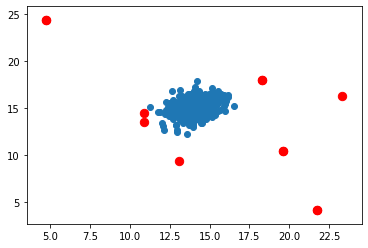

In [27]:
# find outlier
outliers=np.where(p<epsilon)
plt.scatter(x[:,0],x[:,1])
plt.scatter(x[anomalies[0],0],x[outliers[0],1],color='r',s=70)
